# Preparing the environment

In [3]:
# Pandas
import pandas as pd
import numpy as np
from scipy import stats
# Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn import svm, tree
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Abilitiamo la possibilità di visualizzare tutte le colonne e righe di un dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# *PHASE 1: DESCRIPTION AND ANALYSIS OF DATA SETS*

# We load the dataset into a data frame that we call a “tuxedo”.

In [4]:
smoking = pd.read_csv("/content/dataset.csv", sep=",")
# Visualizzaziamo le prime e ultime righe del dataframe
print(smoking.head())
smoking.tail()

   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              0.6              1               1       135          87   
1              0.7              2               2       146          83   
2              0.5              1               1       118          75   
3              1.2              1               1       131          88   
4              1.0              1               1       121          76   

   fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
0                   94          172           300   40   75        16.5   
1       

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1
159255,159255,40,145,45,76.4,1.0,1.2,1,1,125,87,83,186,87,87,81,14.0,1,0.8,21,16,17,0,0


# Data mining

In [5]:
# Let's check the dataframe info.
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

We can see that there are 24 variables, 5 of which are of type float and 19 of type int.
There are 159256 rows representing the subjects of the dataset.
We can also see that there is no missing data for each variable.
Some variables are of the wrong type:



*   id represents the subjects in the dataset and should be of type string, since  we won't be performing any calculations on it.

*   dental caries, which tells us whether a subject has cavities or not, should be of type bool.


* smoking, tells us whether a subject smokes or not, and should be of type bool.

# Let's clean up the data

In [6]:
# We convert identity, dental cavities and dinner jacket into the appropriate data type.
new_dtypes = {
    "id": "str",
    "dental caries": "bool",
    "smoking": "bool"
}
# We apply the new data in a new data frame.
smoking_clean = smoking.astype(new_dtypes)
print(smoking_clean.dtypes)

id                      object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries             bool
smoking                   bool
dtype: object


In [7]:
# Double check for missing data
dati_mancanti = smoking_clean.isnull().sum()
print(dati_mancanti)

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


We can confirm that there is no missing data in the data frame.

In [8]:
# Checking for duplicate data
dati_duplicati = smoking_clean[smoking_clean.duplicated()]
print(dati_duplicati)

Empty DataFrame
Columns: [id, age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, Urine protein, serum creatinine, AST, ALT, Gtp, dental caries, smoking]
Index: []


No duplicate lines

In [9]:
# We check that there are no duplicate identifiers
ids_duplicati = smoking_clean[smoking_clean["id"].duplicated()]
print(ids_duplicati)

Empty DataFrame
Columns: [id, age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, Urine protein, serum creatinine, AST, ALT, Gtp, dental caries, smoking]
Index: []


No duplicate identifiers

# We check the statistics for each quantitative variable

In [10]:
smoking_clean.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000


Some variables have very high maximum values compared with the average.

# Let's find the values whose extremes are very high and modify them


*   view(left)



In [11]:
# Let's see which lines have an eyesight(left) value greater than 2
eyesight_left = smoking_clean[smoking_clean['eyesight(left)'] > 2]
print(eyesight_left["eyesight(left)"].to_list())

[9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9]


A value of 9.9 for the vision of the right eye is highly improbable, probably a transcription error.
Let's replace this figure by the approximate acceptable value.

In [12]:
# If the value of eyesight(left) is greater than 2, assign it the value of eyesight(right) if it is less than or equal to 2
smoking_clean.loc[(smoking_clean['eyesight(left)'] > 2) & (smoking_clean['eyesight(right)'] <= 2), 'eyesight(left)'] = smoking_clean['eyesight(right)']
# If there are still values > 2, replace them with 2
smoking_clean.loc[smoking_clean['eyesight(left)'] > 2, "eyesight(left)"] = 2
# Display the result
smoking_clean['eyesight(left)'].describe()


count    159256.000000
mean          0.998377
std           0.310208
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           2.000000
Name: eyesight(left), dtype: float64

view(right)

In [13]:
# We perform the same procedure with eyesight(right)
smoking_clean.loc[(smoking_clean['eyesight(right)'] > 2) & (smoking_clean['eyesight(left)'] <= 2), 'eyesight(right)'] = smoking_clean['eyesight(left)']
# If there are still values > 2, replace them with 2
smoking_clean.loc[smoking_clean['eyesight(right)'] > 2, "eyesight(right)"] = 2
# Display the result
smoking_clean['eyesight(right)'].describe()


count    159256.000000
mean          0.994443
std           0.309532
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           2.000000
Name: eyesight(right), dtype: float64

* LDL
* The LDL variable has a maximum of 1860, which seems out of the ordinary. Let's take a closer look.

In [14]:
# Check the LDL variable, a value of 200 is typically considered very high
LDL_count = smoking_clean[smoking_clean['LDL'] > 200].shape[0]
print(f"We have {LDL_count} subjects with an LDL value greater than 200")


We have 183 subjects with an LDL value greater than 200




*   Gtp



In [15]:
# Remove subjects with Gtp value greater than 300
smoking_clean["Gtp"] = smoking_clean["Gtp"].apply(lambda x: 300 if x > 300 else x)
smoking_clean["Gtp"].describe()


count    159256.000000
mean         36.056186
std          29.082461
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         300.000000
Name: Gtp, dtype: float64

In [16]:
smoking_clean["AST"] = smoking_clean["AST"].apply(lambda x: 300 if x > 300 else x)
smoking_clean["AST"].describe()

count    159256.000000
mean         25.505632
std           8.930360
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         300.000000
Name: AST, dtype: float64

* ALT

In [17]:
smoking_clean["ALT"] = smoking_clean["ALT"].apply(lambda x: 300 if x > 300 else x)
smoking_clean["ALT"].describe()

count    159256.000000
mean         26.512753
std          15.347501
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max         300.000000
Name: ALT, dtype: float64

# Questions and assumptions about the data

In [18]:
# Create a function to calculate the difference between smokers and non-smokers for a variable
def calculate_smoking_difference(var):
  df_var_smoker = smoking_clean[smoking_clean["smoking"] == True][var]
  df_var_non_smoker = smoking_clean[smoking_clean["smoking"] == False][var]

  t_stat_var, p_value_var = stats.ttest_ind(df_var_smoker, df_var_non_smoker)

  print(f"Mean {var} for smokers: {df_var_smoker.mean():.2f}")
  print(f"Mean {var} for non-smokers: {df_var_non_smoker.mean():.2f}")
  print(f"T-test statistic for {var}: {t_stat_var:.2f}")
  print(f"P-value for {var}: {p_value_var:.4f}")


1. What is the percentage of smokers in the data set?

In [19]:
# Filter only smokers' data
total_smokers = smoking_clean[smoking_clean["smoking"] == True].shape[0]
total_ids = smoking_clean.shape[0]
smokers_percentage = round((total_smokers / total_ids) * 100, 2)
print(f"The percentage of smokers in the dataset is: {smokers_percentage}%")


The percentage of smokers in the dataset is: 43.74%


2. Is there a relationship between age and the tendency to smoke?

In [20]:
# The smoking rate varies significantly among different age groups.
# Divide ages into groups of 5 years.
smoking['age_group'] = pd.cut(smoking['age'], bins=range(20, 85, 5), right=False)
# Calculate the proportion of smokers for each age group.
smoking_by_age = smoking.groupby('age_group')['smoking'].mean()
smoking_by_age


age_group
[20, 25)    0.568556
[25, 30)    0.533807
[30, 35)    0.560750
[35, 40)    0.624341
[40, 45)    0.473475
[45, 50)    0.424382
[50, 55)    0.402461
[55, 60)    0.328971
[60, 65)    0.295369
[65, 70)    0.233370
[70, 75)    0.208614
[75, 80)    0.153409
Name: smoking, dtype: float64

The average number of smokers is highest in the [35, 40] age bracket.
After the age of 55, the average number of smokers tends to fall until the age of 80, which suggests that the older you get, the less likely you are to smoke.

3. Are people with larger waists more likely to smoke?

In [21]:
calculate_smoking_difference("waist(cm)")

Mean waist(cm) for smokers: 85.67
Mean waist(cm) for non-smokers: 80.93
T-test statistic for waist(cm): 108.66
P-value for waist(cm): 0.0000


The p-value of 0 and T-value of 108.66 suggest that there is a large difference between the mean waist circumference of smokers and non-smokers, so that smokers tend to have a different waist circumference to non-smokers.

4. Is there a correlation between systolic and smoking?

In [22]:
calculate_smoking_difference("systolic")

Mean systolic for smokers: 123.35
Mean systolic for non-smokers: 121.85
T-test statistic for systolic: 23.44
P-value for systolic: 0.0000


The p-value of 0 and T-stat of 23.44 suggest that there is a large difference in mean systolic between smokers and non-smokers, so that smokers tend to have higher systolic than non-smokers.

5. The incidence of dental caries is higher in smokers than in non-smokers.

In [23]:
calculate_smoking_difference("dental caries")

Mean dental caries for smokers: 0.25
Mean dental caries for non-smokers: 0.16
T-test statistic for dental caries: 42.80
P-value for dental caries: 0.0000


The p-value of 0 and T-value of 42.00 suggest that there is a large difference between the average dental caries of smokers and non-smokers, so that smokers are more likely to have dental caries than non-smokers.

6. Do smokers have higher haemoglobin levels than non-smokers?

In [24]:
calculate_smoking_difference("hemoglobin")

Mean hemoglobin for smokers: 15.53
Mean hemoglobin for non-smokers: 14.23
T-test statistic for hemoglobin: 201.47
P-value for hemoglobin: 0.0000


The p-value of 0 and T-stat of 201.47, suggest that there is a large difference of the mean hemoglobin of smokers and nonsmokers, so smokers tend to have different hemoglobin from nonsmokers.

7. What is the difference in cholesterol between smokers and nonsmokers ?

In [25]:
calculate_smoking_difference("Cholesterol")

Mean Cholesterol for smokers: 194.12
Mean Cholesterol for non-smokers: 197.10
T-test statistic for Cholesterol: -20.74
P-value for Cholesterol: 0.0000


The results suggest that there is a big difference between the cholesterol averages of smokers and nonsmokers, nonsmokers seem to have a higher cholesterol value than smokers.

8. How does fasting sugar value vary between smokers and nonsmokers?

In [26]:
calculate_smoking_difference("fasting blood sugar")

Mean fasting blood sugar for smokers: 100.03
Mean fasting blood sugar for non-smokers: 97.05
T-test statistic for fasting blood sugar: 38.70
P-value for fasting blood sugar: 0.0000


The results suggest that there is a big difference in the value of fasting blood sugar between smokers and nonsmokers. Non-smokers tend to have a lower value than smokers.

# Step 2 : Graphical representations of the data

1. Proportion of Smokers by Age Group

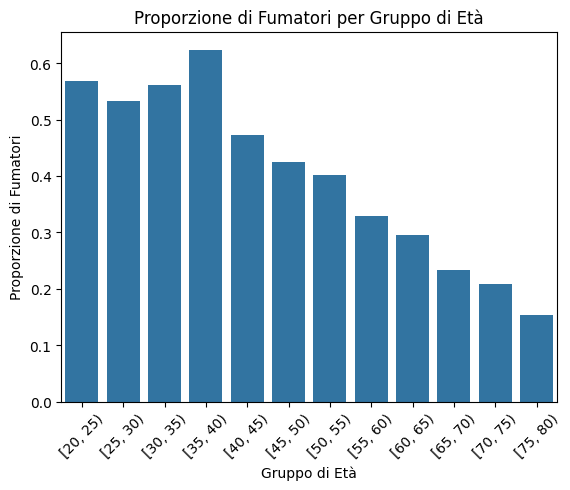

In [27]:
# Visualization with seaborn
sns.barplot(x=smoking_by_age.index, y=smoking_by_age.values)
plt.xlabel('Gruppo di Età')
plt.ylabel('Proporzione di Fumatori')
plt.title('Proporzione di Fumatori per Gruppo di Età')
plt.xticks(rotation=45)
plt.show()

This graphic demonstrates the proportion of smokers according to age. the highest category of smokers is [35,40].
In general we notice that young people under 45 tend to smoke more.
We also notice that after 40, 45 years old, the percentage of smokers gets lower and lower with age. The older you get, the less you tend to smoke.

2. Impact of waist circumference on smoking behavior

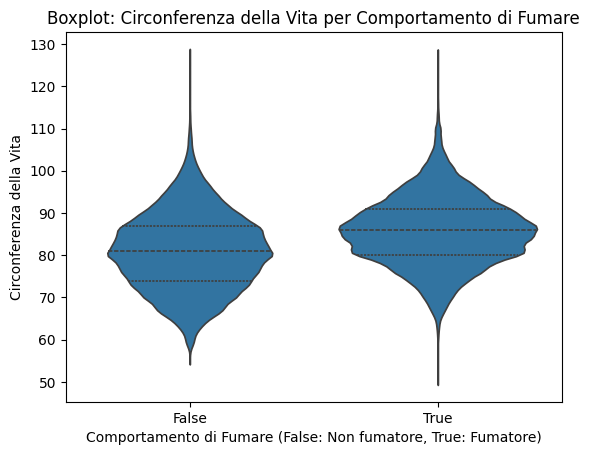

In [28]:
# Boxplot of waist circumference for smokers and non-smokers.
sns.violinplot(x='smoking', y='waist(cm)', data=smoking_clean, inner = "quartile")
plt.xlabel('Comportamento di Fumare (False: Non fumatore, True: Fumatore)')
plt.ylabel('Circonferenza della Vita')
plt.title('Boxplot: Circonferenza della Vita per Comportamento di Fumare')
plt.show()

Compared with nonsmokers, smokers have a higher waist circumference. The distribution of waist circumference is symmetrical for smokers and nonsmokers

3. Relationship between blood pressure and smoking behavior

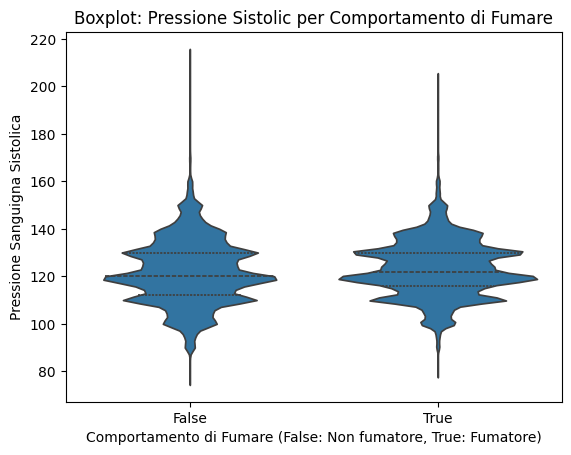

In [29]:
# Boxplots of systolic and diastolic blood pressure for smokers and nonsmokers.
sns.violinplot(x='smoking', y='systolic', data=smoking_clean, inner="quartile")
plt.xlabel('Comportamento di Fumare (False: Non fumatore, True: Fumatore)')
plt.ylabel('Pressione Sanguigna Sistolica')
plt.title('Boxplot: Pressione Sistolic per Comportamento di Fumare')
plt.show()


Smokers have higher systolic blood pressure than nonsmokers. the distribution is higher for smokers, the average systolic of smokers is larger to that of nonsmokers

4.Correlation between ALT and Gtp and smoking behavior

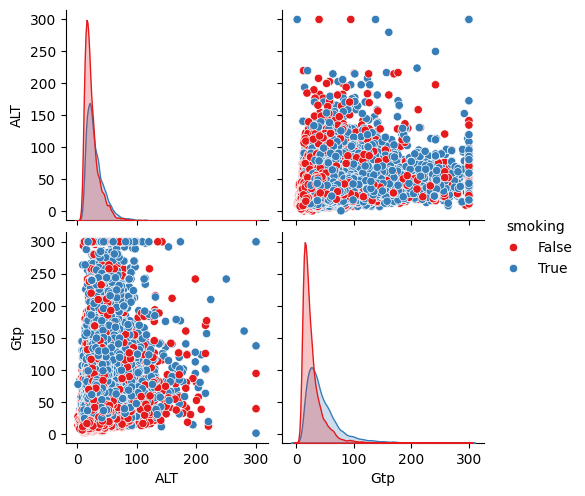

In [30]:
# Let's remove the extreme values of ALT and Gtp to get a more reasonable figure.
sns.pairplot(smoking_clean, hue="smoking", vars=["ALT", "Gtp"], palette="Set1")
plt.show()

Both enzymes are used together in liver panels to provide a more complete picture of liver function. A simultaneous increase in ALT and Gtp may indicate liver damage with a component of biliary obstruction or alcoholism. it is seen that the distribution is higher on AL. Smokers have a large ALT level.

5. Smoking and hemoglobin levels

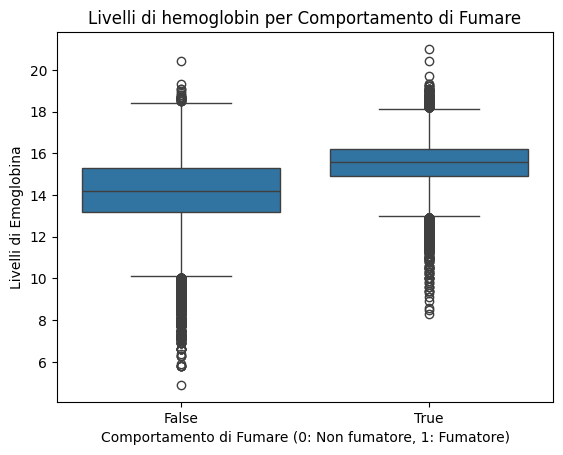

In [31]:
# Boxplot of hemoglobin levels for smokers and nonsmokers.
sns.boxplot(x='smoking', y='hemoglobin', data=smoking_clean)
plt.xlabel('Comportamento di Fumare (0: Non fumatore, 1: Fumatore)')
plt.ylabel('Livelli di Emoglobina')
plt.title('Livelli di hemoglobin per Comportamento di Fumare')
plt.show()


This boxplot shows how smokers have a higher hemoglobin level than nonsmokers. the average hemoglobin of smokers is larger, the distribution and increases.

6. Correlation between the different variable

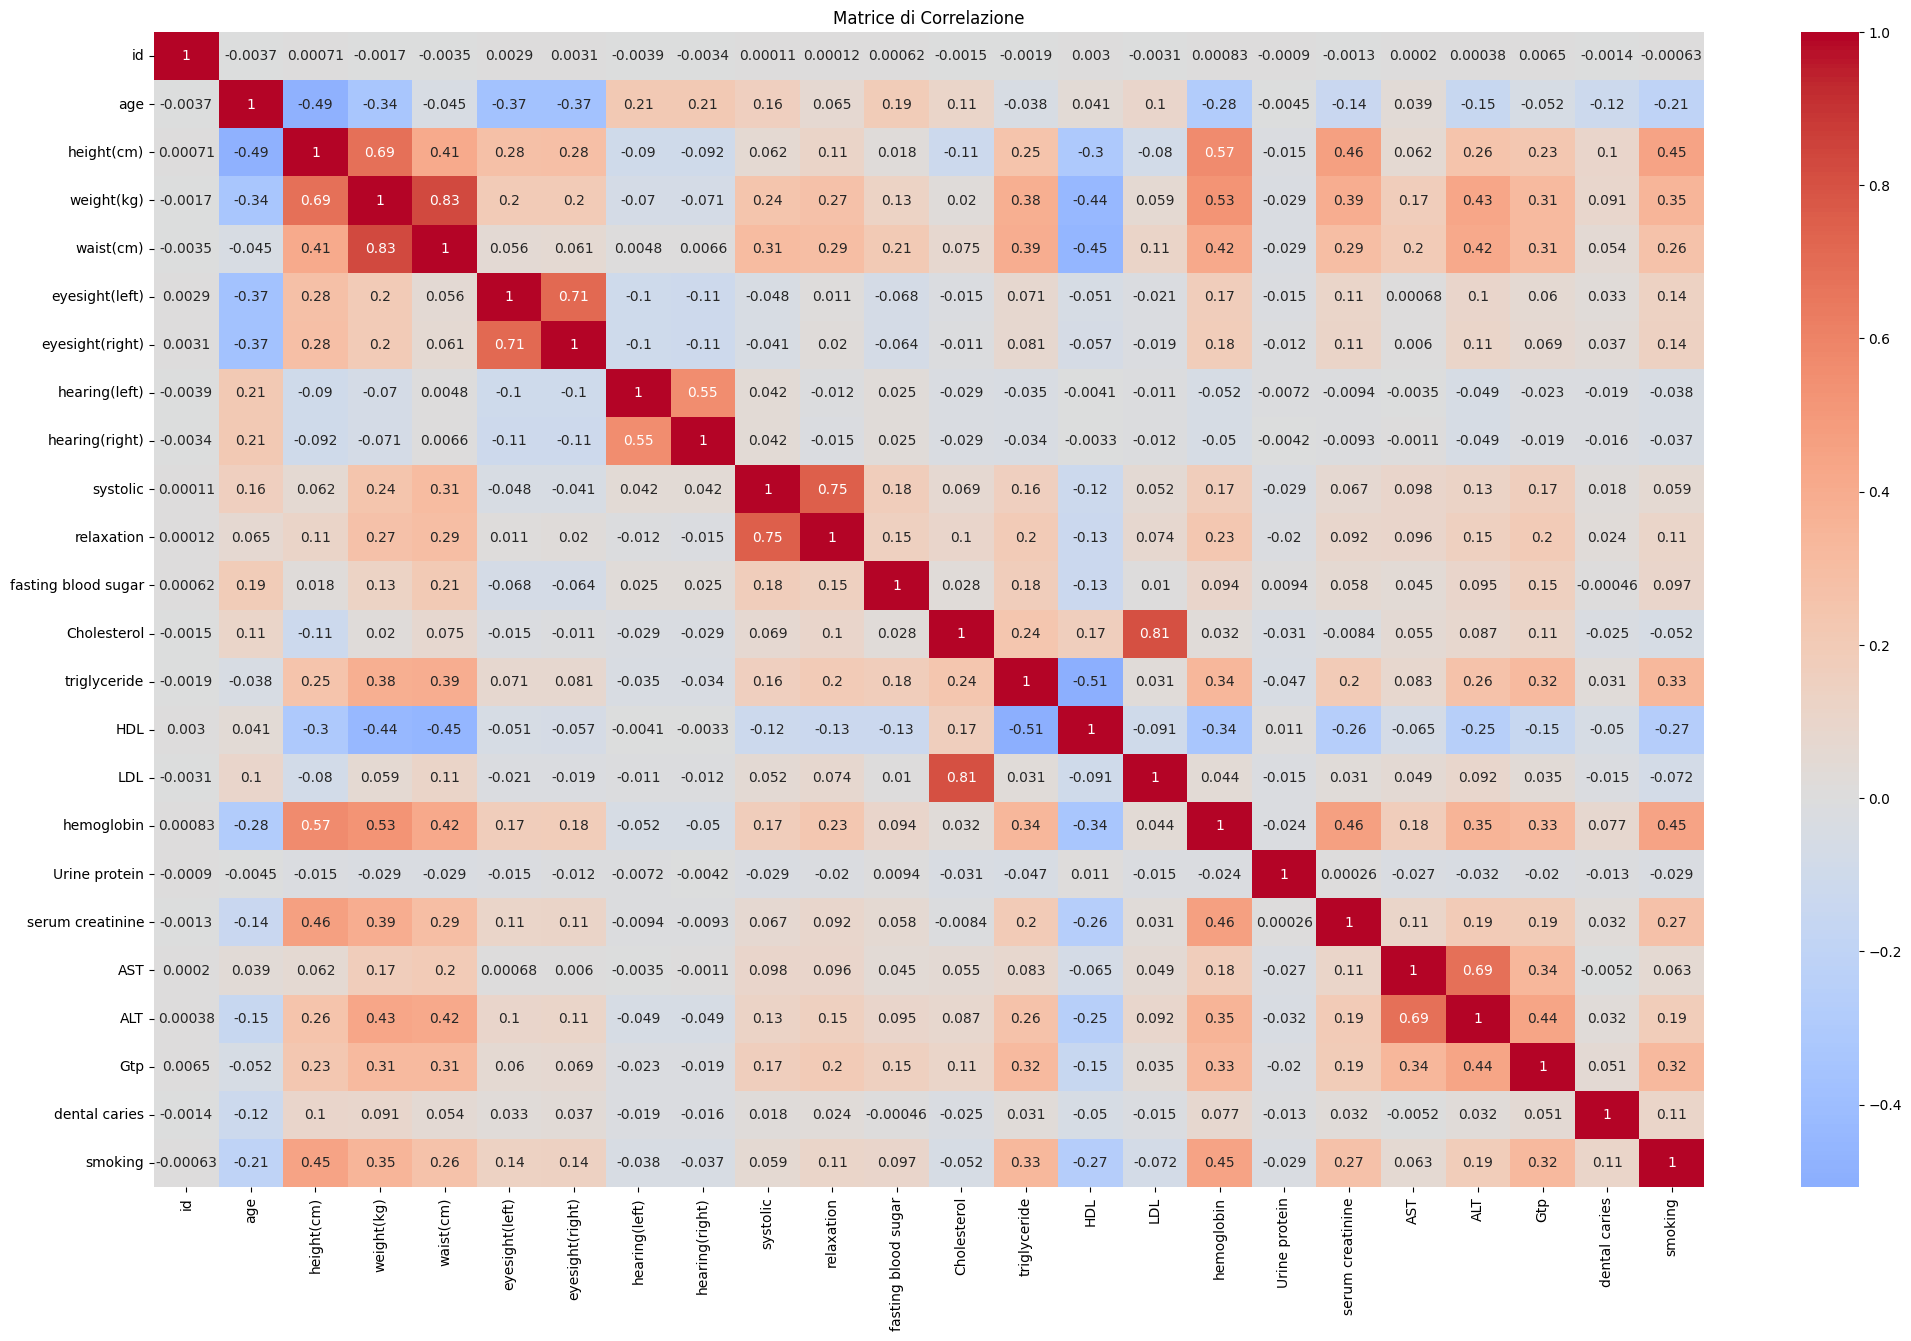

In [32]:
# Calculation of correlation matrix
correlazione_matrix = smoking_clean.corr()

# Visualize the matrix with a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlazione_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione')
plt.show()

A positive correlation exists between the following variables:

* height (height) and weight (weight)
* (waist) and (weight)
* hearing(left) and hearing(right)
* systolic and relaxation
* positive correlation between cholesterol and LDL
* ALT and AST
* Negative correlation exists between triglyceride and HDL

7. **We visualize the correlation between 'LDL' and 'cholesterol'**

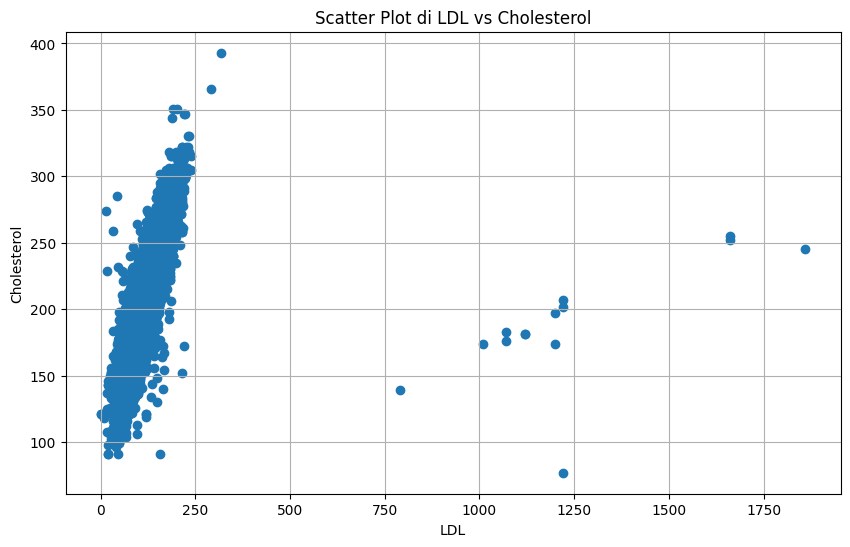

In [33]:
# Create a scatter plot between two columns of interest.


plt.figure(figsize=(10, 6))
plt.scatter(smoking_clean['LDL'], smoking_clean['Cholesterol'])
plt.title('Scatter Plot di LDL vs Cholesterol')
plt.xlabel('LDL')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

This scatter plot between LDL and Cholesterol show an increasing trend and are fairly closely distributed around a 0-250 line of increasing trend, indicating a strong positive correlation between increasing LDL and cholesterol levels.The LDL to total cholesterol ratio is a useful tool in cardiovascular risk assessment.

Correlation between ALT vs AST

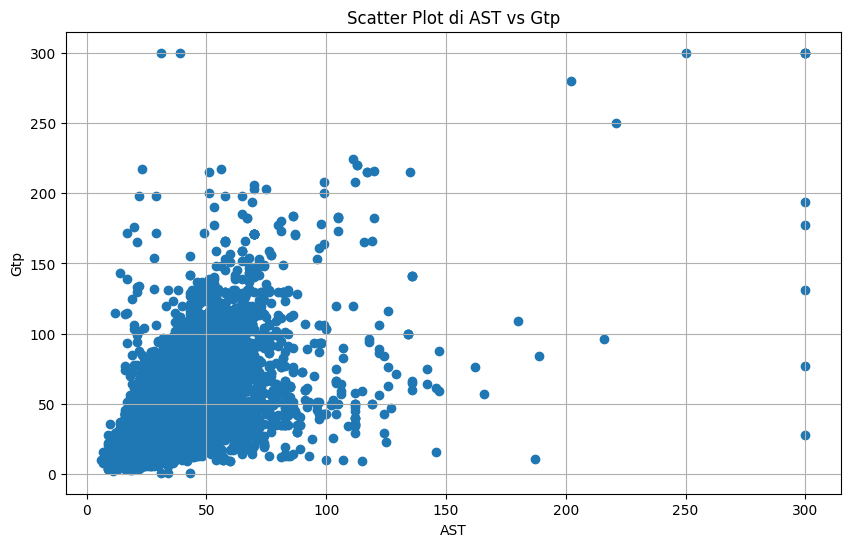

In [34]:
# Create a scatter plot between two columns of interest.

plt.figure(figsize=(10, 6))
plt.scatter(smoking_clean['AST'], smoking_clean['ALT'])
plt.title('Scatter Plot di AST vs Gtp')
plt.xlabel('AST')
plt.ylabel('Gtp')
plt.grid(True)
plt.show()

This scatter plot show an increasing trend between 'AST' and 'Gtp' the distribution and quite tightly around an ascending trend line,indicating a positive correlation between AST and Gtp levels.

# Correlation between triglyceride vs HDL

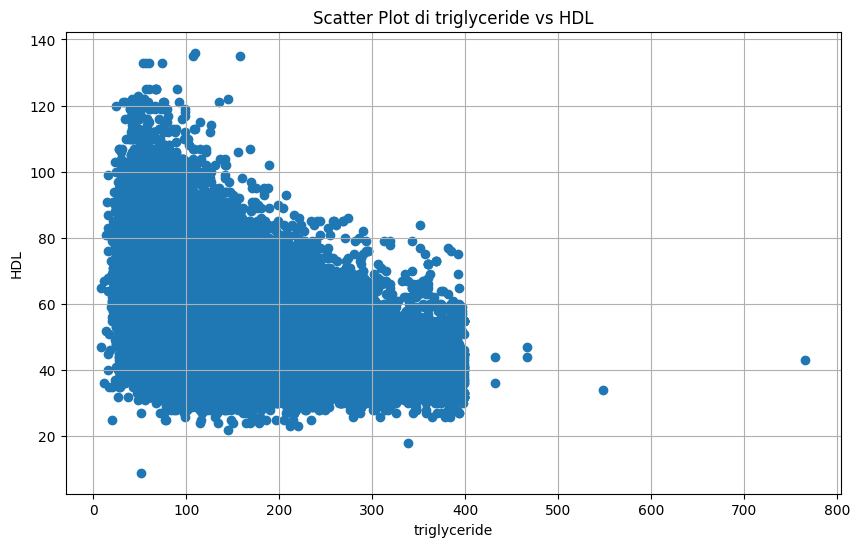

In [35]:
# Creates a scatter plot between two columns of interest
plt.figure(figsize=(10, 6))
plt.scatter(smoking['triglyceride'], smoking['HDL'])
plt.title('Scatter Plot di triglyceride vs HDL')
plt.xlabel('triglyceride')
plt.ylabel('HDL')
plt.grid(True)
plt.show()

This scatter plot between triglycerides and HDL show a decreasing trend and are fairly narrowly distributed. It indicates a moderate negative correlation between triglyceride and HDL levels. A high ratio of triglycerides to HDL is associated with an increased risk of insulin resistance, metabolic syndrome, cardiovascular disease and type 2 diabetes.

# Creatinine level as a function of smoking status.

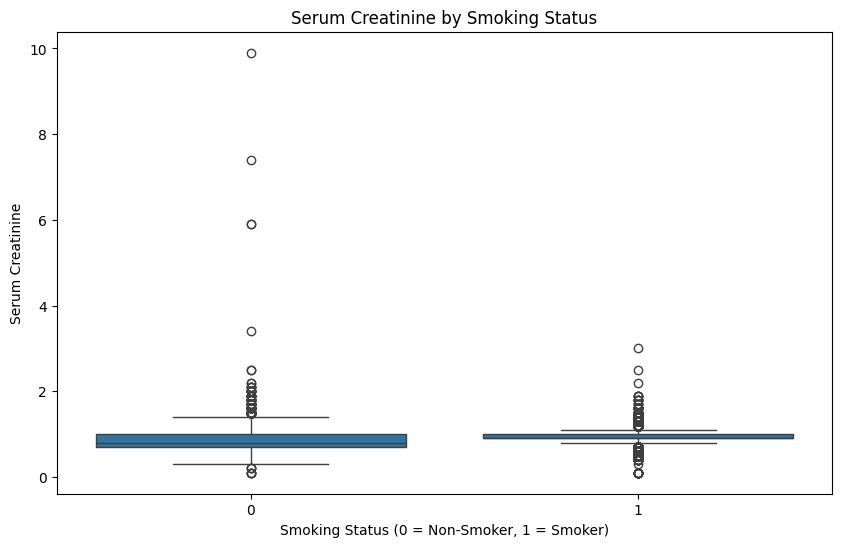

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='serum creatinine', data=smoking)
plt.title('Serum Creatinine by Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Serum Creatinine')
plt.show()


The box plot shows the distribution of 'serum creatinine' levels between smokers and nonsmokers. The median of creatinine levels is higher in the smoking group than in the nonsmoking group, indicating that smokers tend to have higher serum creatinine levels

Level of cholesterol as a function of smoking status

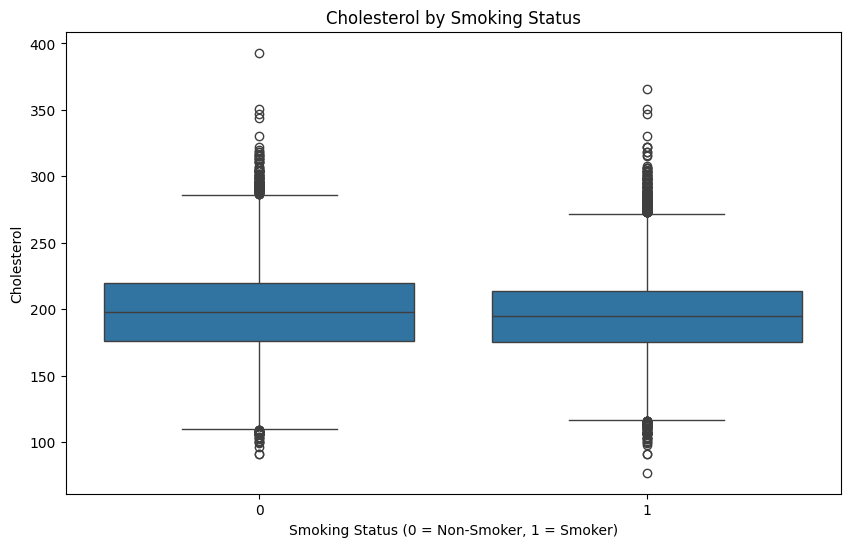

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='Cholesterol', data=smoking)
plt.title('Cholesterol by Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Cholesterol')
plt.show()


The box plot shows that smokers have a higher median cholesterol level than nonsmokers. This suggests that smoking may be related to higher cholesterol levels in the studied sample. there are data showing some individuals with grando cholesterol level, very important level, supper than the maximal value.

# Livello di fasting blood sugar in funzione del statuto di Fumatori

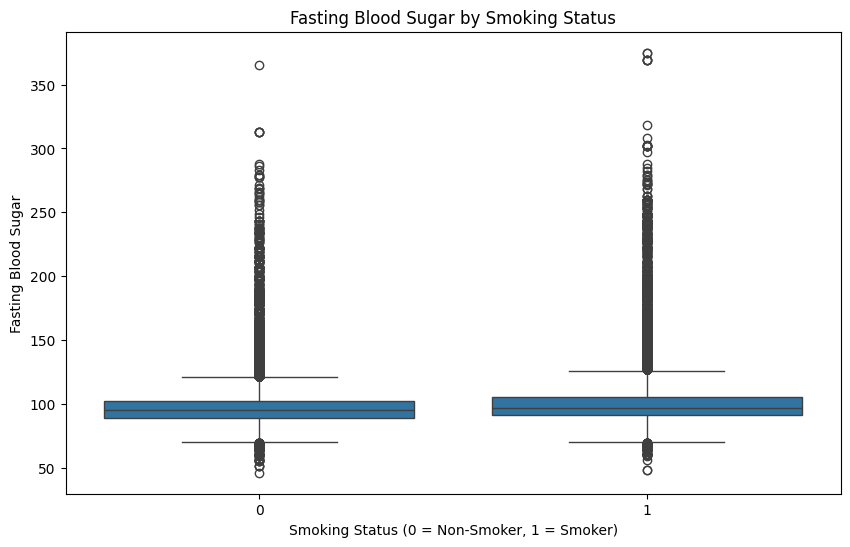

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='fasting blood sugar', data=smoking)
plt.title('Fasting Blood Sugar by Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Fasting Blood Sugar')
plt.show()


The box plot shows that smokers (1) have a higher median fasting blood sugar than nonsmokers (0). This suggests that smoking may be associated with higher fasting blood sugar levels. Some outliers are present in the data of smokers, indicating the presence of individuals with extreme fasting blood sugar levels. These results suggest that smoking could adversely affect fasting blood sugar levels, with potential implications for metabolic risk management

# Triglycedide level as a function of smoking status

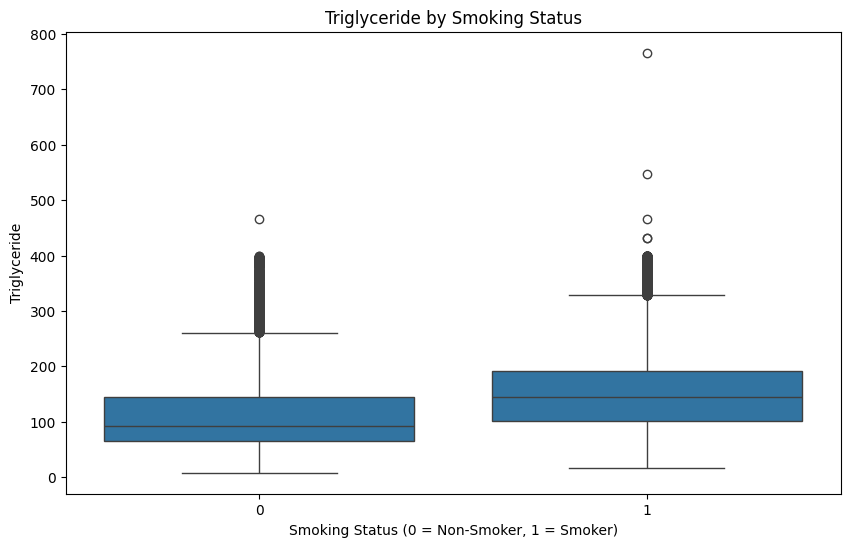

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='triglyceride', data=smoking)
plt.title('Triglyceride by Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Triglyceride')
plt.show()


The box plot shows that smokers tend to have higher median triglycerides than nonsmokers. This suggests that smoking may be associated with higher levels of triglycerides in the blood. There are also outliers in the smokers' data, indicating the presence of individuals with extreme triglyceride levels. These results suggest that smoking could adversely affect blood triglyceride levels, with possible implications for cardiovascular health.

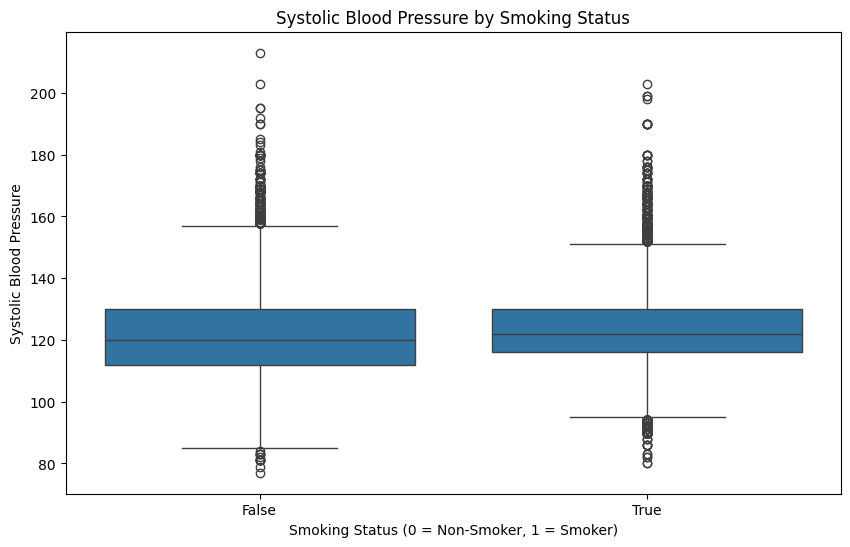

In [40]:
# systolic
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='systolic', data=smoking_clean)
plt.title('Systolic Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Systolic Blood Pressure')
plt.show()


The boxplot shows that the median systolic blood pressure for smokers is higher than for nonsmokers. This result would suggest that smokers tend to have greater variability in systolic blood pressure and may have higher median values than nonsmokers.

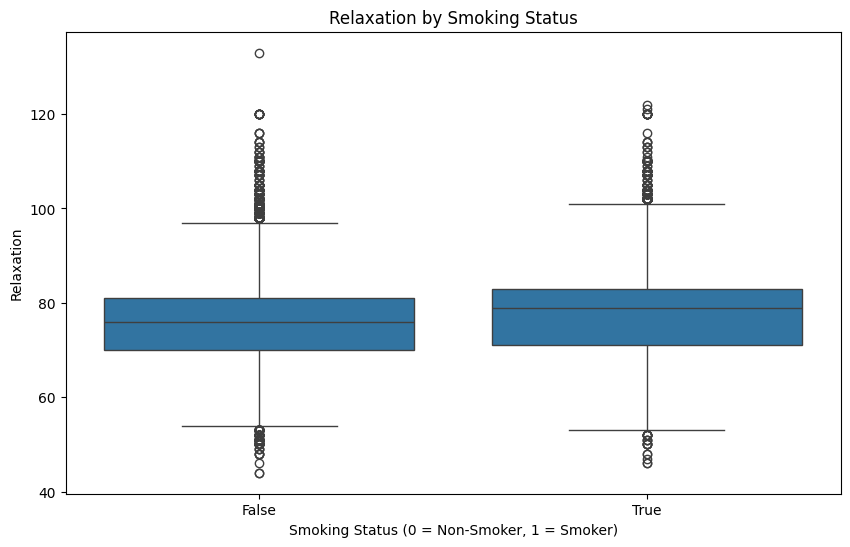

In [41]:
# relaxation
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='relaxation', data=smoking_clean)
plt.title('Relaxation by Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Relaxation')
plt.show()


Il box plot mostra che i fumatori tendono ad avere una pressione arteriosa diastolica mediana diversa rispetto ai non fumatori. Ciò suggerisce che il fumo potrebbe essere associato a diversi livelli di pressione arteriosa diastolica. Inoltre, l'IQR dei fumatori è più ampio di quello dei non fumatori, il che indica una maggiore variabilità della pressione arteriosa diastolica tra i fumatori. Nei dati dei fumatori sono presenti degli outlier, che indicano la presenza di individui con livelli estremi di pressione arteriosa diastolica. Questi risultati suggeriscono che il fumo può influire negativamente sulla pressione arteriosa diastolica, con possibili implicazioni per la salute.

# STEP 3 . Predictive model

Creation of train-test separation Now we use mean_matricula as the random_state.

In [42]:
# Calcolo del valore medio delle matricole
matricole = [194555, 187955]
mean_matricola = int(np.mean(matricole))
print(f'Mean matricola: {mean_matricola}')


Mean matricola: 191255


Changes and drops of columns not useful for the purpose of the model

In [43]:
variabili_da_eliminare = ["id", "height(cm)", "waist(cm)", "relaxation", "LDL", "ALT", "Gtp"]
smoking_model = smoking_clean.drop(columns=variabili_da_eliminare)
smoking_model.head()

,age,weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,dental caries,smoking
0,55,60,0.5,0.6,1,1,135,94,172,300,40,16.5,1,1.0,22,False,True
1,70,65,0.6,0.7,2,2,146,147,194,55,57,16.2,1,1.1,27,True,False
2,20,75,0.4,0.5,1,1,118,79,178,197,45,17.4,1,0.8,27,False,True
3,35,95,1.5,1.2,1,1,131,91,180,203,38,15.9,1,1.0,20,True,False
4,30,60,1.5,1.0,1,1,121,91,155,87,44,15.4,1,0.8,19,False,True


We remove the id, height, waist, relaxation, LDL, ALT is Gtp from the dataset before running the training, as the id's are irrelevant is the other values already have quite stressful correlations with some values.

Division of the dataset into training and test sets

In [44]:
# Identificazione delle caratteristiche e dell'obiettivo
X = smoking_model.drop('smoking', axis=1)
y = smoking_model['smoking']


In [45]:
# Divisione del dataset in addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=mean_matricola)


In [ ]:
# Normalizzazione dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Addestriamo il modello SVM
svm_model = svm.SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)

# Facciamo una predizione del test set
y_pred = svm_model.predict(X_test)

# Evaluiamo il modello
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("SVM - Confusion Matrix:")
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

# Visualizziamo la matrice di confusione per il modello SVM
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Smokers", "Smokers"], yticklabels=["Non Smokers", "Smokers"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("SVM - Confusion Matrix")
plt.show()


In [ ]:
# Addestriamo il modello per il "Decision Tree"
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

# Evaluiamo il modello di decision tree
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))

print("Decision Tree Confusion Matrix:")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(conf_matrix_tree)

# Visualizziamo la matrice di confusione per il modello decision tree
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Smokers", "Smokers"], yticklabels=["Non Smokers", "Smokers"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


# Conslusions
In summary, after analyzing is explore the data, we visualized Using visualization techniques such as scatter plot, bar graphs... after we made predictive model using SVM model is Decision Tree. SVM MODEL:



*   NON-SMOKING ACCURACY: 0.80
*   ACCURACY SMOKERS: 0.67
*   ACCURACY: 0.73
*   DECISION TREE MODEL:



*   NONSMOKING ACCURACY: 0.70
*   SMOKING PRECISION: 0.62
*   ACCURACY: 0.67
Both models predict smokers with better accuracy than nonsmokers. We note a better performance of the SVM model in both precision and accuracy.